# CPSC 4810 TEAM PROJECT 
### Member: 
- An Nguyen
- Andy Nguyen
- Dawn Dang - 100413772
- Huan Le Van - 100418149

# TABLE OF CONTENTS
1. PROJECT DESCRIPTION
2. THE DATA
    1. Supplemental Data
3. BACKGROUND RESEARCH
4. READ IN THE DATA
    1. Reading .csv files
    2. Reading .txt files
        1. Data Selection
5. GETTING TO KNOW THE DATA
6. DATA PREPARATION
    1. Jobs postings
    2. Company details
7. ANALYSIS

## PROJECT DESCRIPTION

Our project focuses on analyzing job postings on LinkedIn in the USA last year, using a combination of datasets to ensure we cover all the necessary information. We prioritize data acquisition, preparation, cleaning, and aggregation to create a top-notch dataset for exploratory data analysis (EDA). Through EDA, we aim to discover important insights into the job market, like popular skills, common job titles, where opportunities are located, and trends in different industries. By providing clear insights, our project aims to help decision-making and improve the job market.

## BACKGROUND RESEARCH

Our research centers on analyzing job advertisements on LinkedIn within the United States in 2023. We aim to understand job posting trends, companies' profiles, and job requirements and compensations. Given the complexity of the datasets, we must clean, map, combine, or drop datasets to ensure accuracy.

Key areas of focus include:

- Job Ads Posted on LinkedIn in the US: Examining trends and geographical variations across 50 states.
- Companies Posting Jobs: Analyzing company profiles, including size and industry.
- Job Requirements and Compensation: Investigating diverse skill sets and salary structures.

Our analysis acknowledges variability across states and industries, guiding us to consolidate datasets for effective exploration of correlations and patterns.

## THE DATA

Every day, LinkedIn serves as a go-to platform for thousands of companies and individuals seeking talent or career opportunities. This dataset offers an extensive collection of over 33,000 job postings spanning two distinct days, months apart. Each job listing is rich in detail, encompassing 27 key attributes such as job title, description, salary, location, application URL, and work arrangements (including remote or contract positions). Additionally, supplemental files provide insights into associated benefits, required skills, and relevant industries. Linked to the majority of job postings are corresponding company profiles, detailed in a separate CSV file, featuring company descriptions, headquarters location, employee count, and follower metrics.
Our main datasets:
- companies.csv - Details about hiring companies
- job_postings.csv - Details about the jobs 

## SUPPLEMENT DATA

Our project also utilise supplemental files from the same source; that offer enriched insights into the job market. These additional datasets provide valuable information on benefits, skills, industries, and company profiles associated with each job posting. By exploring these supplementary datasets, users gain deeper insights into job market dynamics, enabling informed decision-making and strategic planning in talent acquisition and employment.

Supplement datasets:
- **company_industries.csv** : Details on hiring compannies' registered industry names including company IDs.
- **industries.csv** and **jobs_industries.csv**: Lists of industry IDs, matching job IDs, and industry names.
- **company_specialities.csv**: Details on hiring companies special field.
- **employee_counts.csv**: Provide information about hiring companies' number of current employees, its followers and well as the time said data were collected.
- **job_skills.csv** and **skills.csv**: Lists of the key required skills for each job, along with matching job IDs and skill abbreviations.
- **benefit.csv**: contains lists of benefits offered, each matched with corresponding job IDs. 
- **Salaries.csv**: provides information on the compensation range for each job ID, including pay period, currency, and compensation type.

## DATA PREPARATION

In [37]:
#Import library
import pandas as pd
import numpy as np

#### Jobs_postings

In [38]:
#load data
jobs_posting = pd.read_csv('./data/job_postings.csv')
jobs_posting.head(5)    

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,NaN,Entry level,NaN,1.700000e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,NaN,NaN,NaN,1.700000e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.700000e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,NaN,Entry level,NaN,1.700000e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,NaN,Mid-Senior level,NaN,1.700000e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


#### company_detail

In [39]:
df_comp = pd.read_csv('./data/company_details/companies.csv')
df_comp.head(5)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


### Mapping company sizes
We generate a mapping file to correlate company size levels (1-7) with real company sizes on LinkedIn, aiming to explore how company size influences offered skills and salaries in job postings.

In [40]:
comp_level = {
    'Level': [7, 6, 5, 4, 3, 2, 1],
    'Company size': ['10,001 +', '5001-10,000', '1001-5000', '501-1000', '201-500', '51-200', 'Under 50']
}

df_comp_level = pd.DataFrame(comp_level)
df_comp_level

,Level,Company size
0,7,"10,001 +"
1,6,"5001-10,000"
2,5,1001-5000
3,4,501-1000
4,3,201-500
5,2,51-200
6,1,Under 50


In [41]:
df_comp_merged = pd.merge(df_comp_level, df_comp, left_on='Level', right_on='company_size', how='inner')
df_comp_merged.head(5)

,Level,Company size,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,7,"10,001 +",1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,7,"10,001 +",1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,7,"10,001 +",1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,7,"10,001 +",1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,7,"10,001 +",1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


### Convert number to datetime format
Data store the date and time the posting was posted, expired but in epoch format so we need to convert to readable date time format

In [42]:
jobs_posting['new_original_listed_time'] = pd.to_datetime(jobs_posting['original_listed_time'], unit='ms')
jobs_posting['new_closed_time'] = pd.to_datetime(jobs_posting['closed_time'], unit='ms')
jobs_posting['new_listed_time'] = pd.to_datetime(jobs_posting['listed_time'], unit='ms')

In [43]:
jobs_posting[['closed_time','listed_time','new_original_listed_time','new_closed_time','new_listed_time']]

,closed_time,listed_time,new_original_listed_time,new_closed_time,new_listed_time
0,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
1,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
2,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
3,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
4,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
...,...,...,...,...,...
33241,NaN,1.690000e+12,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40
33242,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
33243,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
33244,NaN,1.690000e+12,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40


### Calculate yearly average salary


The salary data in the raw file is in different format (Yearly, Monthly, Hourly, Weekly ...)

In [44]:
jobs_posting['pay_period'].unique()

array(['MONTHLY', nan, 'HOURLY', 'YEARLY', 'WEEKLY', 'ONCE'], dtype=object)

We have to transform the salary to a single format (__Yearly__) to do the related analysis

avarage = medium salary or = (max + min) /2

In [45]:
# Fill NaN values in 'med_salary' with the average of 'max_salary' and 'min_salary'
jobs_posting['avg_salary'] = jobs_posting['med_salary'].fillna((jobs_posting['max_salary'] + jobs_posting['min_salary']) / 2)

# Change all salary to yearly salary unit
jobs_posting['yearly_avg_salary'] = jobs_posting['avg_salary']
multiplier_map = {'YEARLY': 1,
                  'HOURLY': 40 * 52.2,
                  'MONTHLY': 12,
                  'WEEKLY': 52.2,
                  'ONCE': 1}
jobs_posting['yearly_avg_salary'] *= jobs_posting['pay_period'].map(multiplier_map)
jobs_posting.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,sponsored,work_type,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,0,FULL_TIME,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,0,FULL_TIME,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699085346,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.00


For the jobs with NA salary, we are going to fill with the mean values of similar job (same industry, work_type, experience_level)

In [46]:
jobs_posting[jobs_posting['yearly_avg_salary'].isnull()]

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,sponsored,work_type,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,0,FULL_TIME,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,0,FULL_TIME,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
5,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,NaN,...,0,FULL_TIME,NaN,NaN,1699137801,2023-11-14 22:13:20,2023-11-14 22:13:20,2023-11-14 22:13:20,NaN,NaN
6,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",NaN,...,0,FULL_TIME,NaN,NaN,1699089473,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",NaN,NaN,NaN,NaN,Full-time,"Sussex, NJ",NaN,...,0,FULL_TIME,NaN,NaN,1699138852,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,218881389,NaN,Accounting Associate,NaN,NaN,NaN,NaN,Full-time,"Bolingbrook, IL",1.0,...,0,FULL_TIME,NaN,NaN,1699084455,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
33240,133196985,1089558.0,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,...,0,CONTRACT,NaN,NaN,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,NaN,NaN
33241,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,...,0,FULL_TIME,NaN,NaN,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,NaN,NaN
33242,108965123,NaN,Office Administrative Assistant,NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,...,0,FULL_TIME,NaN,NaN,1699044401,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN


Get job industries:

In [47]:
job_industries = pd.read_csv('./data/job_details/job_industries.csv')
industries = pd.read_csv('./data/maps/industries.csv')

In [48]:
jobs_posting_2 = pd.merge(jobs_posting,job_industries, on = 'job_id', how = 'left')
jobs_posting_2 = pd.merge(jobs_posting_2, industries, on = 'industry_id', how = 'left')
jobs_posting_2.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00,17.0,Medical Equipment Manufacturing
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,135.0,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,147.0,Automation Machinery Manufacturing
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,100.0,Non-profit Organizations
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,USD,BASE_SALARY,1699085346,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.00,27.0,Retail


In [49]:
#fill NA
jobs_posting_2['yearly_avg_salary'] = jobs_posting_2.groupby(['formatted_work_type', 'formatted_experience_level','industry_name'])['yearly_avg_salary'].transform(lambda x: x.fillna(x.mean()))

# If there are still NaN values that couldn't be filled because the entire group had NaN, fill them with the mean of the whole 'yearly_avg_salary' column
#jobs_posting['yearly_avg_salary'].fillna(jobs_posting['yearly_avg_salary'].mean(), inplace=True)


In [22]:
jobs_posting_2[jobs_posting_2['yearly_avg_salary'].isnull()]

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,135.0,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,147.0,Automation Machinery Manufacturing
12,3757935384,232541.0,Power Utility Distribution Designer II (Remote),NaN,NaN,NaN,NaN,Full-time,"Hammond, IN",NaN,...,NaN,NaN,1699086574,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,3242.0,Engineering Services
15,3757935026,16223627.0,Nurse Practitioner,NaN,NaN,NaN,NaN,Contract,"Toms River, NJ",NaN,...,NaN,NaN,1699139453,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,14.0,Hospitals and Health Care
22,3757934944,18270206.0,Branch Manager Truss,NaN,NaN,NaN,NaN,Full-time,"La Grande, OR",NaN,...,NaN,NaN,1699136299,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,1324.0,Retail Building Materials and Garden Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43590,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,...,NaN,NaN,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,NaN,NaN,92.0,Truck Transportation
43591,108965123,NaN,Office Administrative Assistant,NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,...,NaN,NaN,1699044401,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,19.0,Retail Apparel and Fashion
43592,102339515,52132271.0,Franchise Owner,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,...,NaN,NaN,1699063495,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,91.0,Consumer Services
43593,85008768,NaN,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,...,USD,BASE_SALARY,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,48880.0,NaN,42.0,Insurance


### Remove NA row for missing experience level

In [50]:
jobs_posting.columns.tolist()

['job_id',
 'company_id',
 'title',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'formatted_work_type',
 'location',
 'applies',
 'original_listed_time',
 'remote_allowed',
 'views',
 'job_posting_url',
 'application_url',
 'application_type',
 'expiry',
 'closed_time',
 'formatted_experience_level',
 'skills_desc',
 'listed_time',
 'posting_domain',
 'sponsored',
 'work_type',
 'currency',
 'compensation_type',
 'scraped',
 'new_original_listed_time',
 'new_closed_time',
 'new_listed_time',
 'avg_salary',
 'yearly_avg_salary']

In [52]:
jobs_posting['formatted_experience_level'].value_counts(dropna=False)

formatted_experience_level
Mid-Senior level    11258
NaN                  9181
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: count, dtype: int64

In [53]:
jobs_posting['formatted_experience_level'].isna().sum()

9181

In [16]:
jobs_posting['formatted_experience_level'].notna().sum()

24065

In [54]:
jobs_posting = jobs_posting[jobs_posting['formatted_experience_level'].notnull()]
jobs_posting['formatted_experience_level'].isna().sum()

0

#### Location 

The Location column in the dataset include 4 format of infomation:
- Country (United States)
- City + Shortname of state (Ex: New York, NY ..)
- City + State + Country (Ex: St Clair Shores, Michigan, United States ..)
- Metropolitan Area (Ex: New York City Metropolitan Area ..)

In the scope of this analysis, we just deal with the 2nd & 3rd types, which is to process the state infomation



In [18]:
jobs_posting.groupby('location').size().reset_index(name = 'counts').sort_values(by = 'counts', ascending=False).head(15)

,location,counts
3629,United States,1407
2512,"New York, NY",561
628,"Chicago, IL",391
1641,"Houston, TX",322
138,"Atlanta, GA",294
830,"Dallas, TX",294
360,"Boston, MA",252
162,"Austin, TX",236
2048,"Los Angeles, CA",212
3737,"Washington, DC",203


External dataset __abbr-name.json__ includes infomation of shortname mapping to name of state

In [25]:
df_states = pd.read_json('./data/abbr-name.json', orient='index')
df_states.reset_index(inplace=True)
df_states.columns = ['state_short_name', 'state']
df_states.head(5)

,state_short_name,state
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


Filter list of locations (City, State) from the job_posting dataset:

In [26]:
df_location  = pd.DataFrame(jobs_posting[(jobs_posting['location'].str.contains(','))]['location'].unique())
df_location.columns  = ['Location']
df_location.head(5)

,Location
0,"Little River, SC"
1,"Beaver Dam, WI"
2,"Bessemer, AL"
3,"Aliso Viejo, CA"
4,"Daytona Beach, FL"


In [27]:
df_location[['city','state','country']] = df_location['Location'].str.split(', ', expand=True)
df_location

,Location,city,state,country
0,"Little River, SC",Little River,SC,None
1,"Beaver Dam, WI",Beaver Dam,WI,None
2,"Bessemer, AL",Bessemer,AL,None
3,"Aliso Viejo, CA",Aliso Viejo,CA,None
4,"Daytona Beach, FL",Daytona Beach,FL,None
...,...,...,...,...
4486,"Thomson, GA",Thomson,GA,None
4487,"Pendleton, OR",Pendleton,OR,None
4488,"Arlington, WA",Arlington,WA,None
4489,"Bohemia, NY",Bohemia,NY,None


Now we join with state list (__abbr-name.json__) to get statename

In [28]:
df_location_merge = pd.merge(df_location, df_states, left_on='state', right_on='state_short_name', how='left')
df_location_merge

,Location,city,state_x,country,state_short_name,state_y
0,"Little River, SC",Little River,SC,None,SC,South Carolina
1,"Beaver Dam, WI",Beaver Dam,WI,None,WI,Wisconsin
2,"Bessemer, AL",Bessemer,AL,None,AL,Alabama
3,"Aliso Viejo, CA",Aliso Viejo,CA,None,CA,California
4,"Daytona Beach, FL",Daytona Beach,FL,None,FL,Florida
...,...,...,...,...,...,...
4486,"Thomson, GA",Thomson,GA,None,GA,Georgia
4487,"Pendleton, OR",Pendleton,OR,None,OR,Oregon
4488,"Arlington, WA",Arlington,WA,None,WA,Washington
4489,"Bohemia, NY",Bohemia,NY,None,NY,New York


However, when filtering the location with column country is not null, we can see that the state_x column is already in full state name. So we just update the state_y colums = state_x columns for these rows

In [29]:
df_location_merge[df_location_merge['country'].notnull()].head(5)

,Location,city,state_x,country,state_short_name,state_y
9,"St Clair Shores, Michigan, United States",St Clair Shores,Michigan,United States,NaN,NaN
175,"Wilmington, Delaware, United States",Wilmington,Delaware,United States,NaN,NaN
244,"Denver, Colorado, United States",Denver,Colorado,United States,NaN,NaN
273,"Fremont, California, United States",Fremont,California,United States,NaN,NaN
512,"Los Angeles, California, United States",Los Angeles,California,United States,NaN,NaN


In [30]:
df_location_merge.loc[df_location_merge['country'].notnull(), 'state_y'] = df_location_merge['state_x']

In [31]:
df_location_merge[df_location_merge['country'].notnull()].head(5)

,Location,city,state_x,country,state_short_name,state_y
9,"St Clair Shores, Michigan, United States",St Clair Shores,Michigan,United States,NaN,Michigan
175,"Wilmington, Delaware, United States",Wilmington,Delaware,United States,NaN,Delaware
244,"Denver, Colorado, United States",Denver,Colorado,United States,NaN,Colorado
273,"Fremont, California, United States",Fremont,California,United States,NaN,California
512,"Los Angeles, California, United States",Los Angeles,California,United States,NaN,California


In [32]:
# Drop redundant columns
df_location_merge.drop(columns=['state_x','country','state_short_name'], inplace=True)

# Rename the columns for clarity
df_location_merge.rename(columns={'state_y': 'state'}, inplace=True)

In [33]:
#drop NA:
df_location_merge.dropna(subset = ['state'])

,Location,city,state
0,"Little River, SC",Little River,South Carolina
1,"Beaver Dam, WI",Beaver Dam,Wisconsin
2,"Bessemer, AL",Bessemer,Alabama
3,"Aliso Viejo, CA",Aliso Viejo,California
4,"Daytona Beach, FL",Daytona Beach,Florida
...,...,...,...
4486,"Thomson, GA",Thomson,Georgia
4487,"Pendleton, OR",Pendleton,Oregon
4488,"Arlington, WA",Arlington,Washington
4489,"Bohemia, NY",Bohemia,New York


Now we finally join with the original dataset to get the state:


In [55]:
jobs_posting = pd.merge(jobs_posting, df_location_merge, left_on='location', right_on='Location', how='left')
#jobs_posting_lcn.dropna(subset = ['state'])
jobs_posting.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,Location,city,state
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00,"Little River, SC",Little River,South Carolina
1,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,"Aliso Viejo, CA",Aliso Viejo,California
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,BASE_SALARY,1699085346,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.00,NaN,NaN,NaN
3,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,NaN,...,NaN,1699137801,2023-11-14 22:13:20,2023-11-14 22:13:20,2023-11-14 22:13:20,NaN,NaN,NaN,NaN,NaN
4,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",NaN,...,NaN,1699089473,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,"Daytona Beach, FL",Daytona Beach,Florida


## Number of job by experience level and company size

In [92]:
jobs_posting_lcn = pd.merge(jobs_posting_1, final_merged[['company_id', 'Company size']], on='company_id', how='left')
jobs_posting_lcn.rename(columns={'Company size': 'Company size'}, inplace=True)
jobs_posting_lcn.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,Location,city,state,Company size
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.700000e+12,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.700000e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00,"Little River, SC",Little River,South Carolina,1001-5000
1,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.700000e+12,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.700000e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00,"Little River, SC",Little River,South Carolina,1001-5000
2,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.700000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.700000e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,"Aliso Viejo, CA",Aliso Viejo,California,501-1000
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.700000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.700000e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,"Aliso Viejo, CA",Aliso Viejo,California,501-1000
4,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.700000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.700000e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,"Aliso Viejo, CA",Aliso Viejo,California,501-1000


In [93]:
jobs_count = merged_df.groupby(['formatted_experience_level', 'Company size']).size()
jobs_count

formatted_experience_level  Company size
Associate                   10,001 +        17843
                            1001-5000       17928
                            201-500          5451
                            5001-10,000      1542
                            501-1000         2255
                            51-200           2785
                            Under 50          727
Director                    10,001 +        10471
                            1001-5000        3005
                            201-500         40195
                            5001-10,000      1245
                            501-1000         2268
                            51-200           1833
                            Under 50          222
Entry level                 10,001 +        90877
                            1001-5000       20711
                            201-500          4322
                            5001-10,000     24841
                            501-1000        16485
         

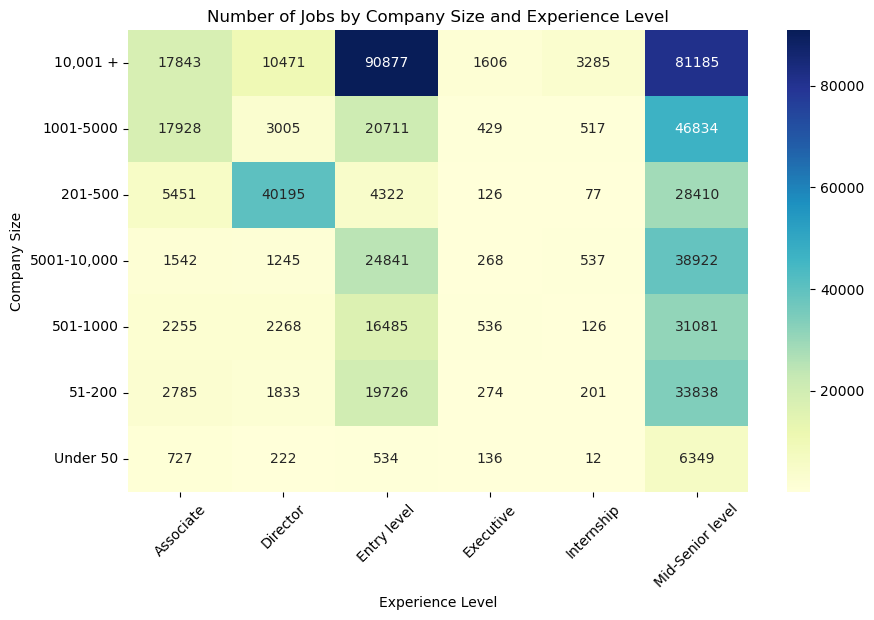

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to have 'Company size' and 'formatted_experience_level' as columns
jobs_count1 = jobs_count.reset_index()

# Pivot the DataFrame to have 'Company size' as rows, 'formatted_experience_level' as columns, and values as job counts
pivot_table = jobs_count1.pivot(index='Company size', columns='formatted_experience_level', values=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Number of Jobs by Company Size and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.xticks(rotation=45)
plt.show()

## Mean salary by experience level and company size

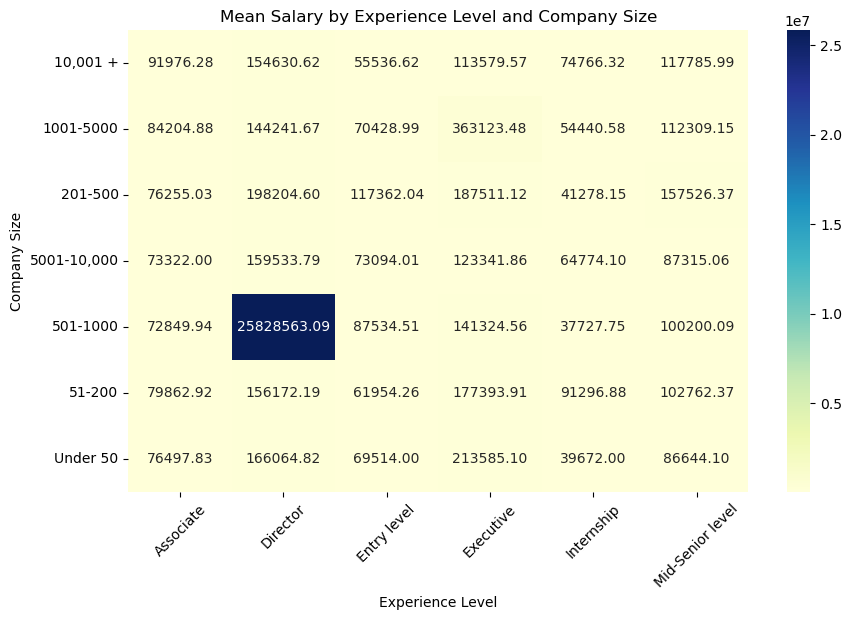

In [95]:
# Group the data by 'Company size' and 'formatted_experience_level', and calculate the mean of 'yearly_avg_salary' for each group
mean_salary = jobs_posting_lcn.groupby(['Company size', 'formatted_experience_level'])['yearly_avg_salary'].mean()
# Reset index to have 'Company size' and 'formatted_experience_level' as columns
mean_salary = mean_salary.reset_index()
# Sort by company size
mean_salary = mean_salary.sort_values(by='Company size')
pivot_table = mean_salary.pivot(index='Company size', columns='formatted_experience_level', values='yearly_avg_salary')

# Plot 

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Mean Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.xticks(rotation=45)
plt.show()

## Salary /Number of job by industry

In [96]:
comp_industries = pd.read_csv("./data/company_details/company_industries.csv")
jobs_posting_lcn = pd.merge(jobs_posting_lcn, comp_industries[['company_id', 'industry']], on='company_id', how='left')

In [97]:
industry_stats = jobs_posting_lcn.groupby('industry').agg({'yearly_avg_salary': 'mean', 'job_id': 'count'})
industry_stats = industry_stats.rename(columns={'yearly_avg_salary': 'Mean Salary', 'job_id': 'Number of Jobs'})
industry_stats = industry_stats.dropna()
industry_stats

,Mean Salary,Number of Jobs
industry,,
Accounting,85576.099556,950
Administration of Justice,83130.439811,53
Advertising Services,96348.708178,491
Airlines and Aviation,76611.310000,198
Airlines/Aviation,123015.169524,34
Alternative Medicine,36540.000000,62
Apparel & Fashion,50253.872755,661
"Appliances, Electrical, and Electronics Manufacturing",109734.741074,3769
Architecture & Planning,82253.620000,50


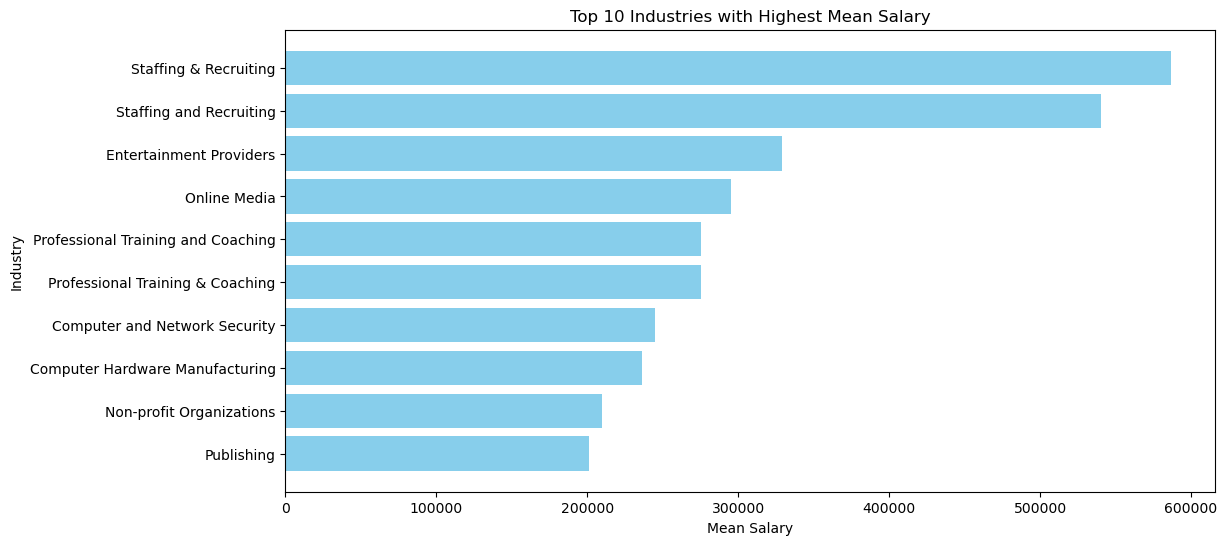

In [98]:
industry_stats_sorted = industry_stats.sort_values(by='Mean Salary', ascending=False) # sort mean
top_10_industries = industry_stats_sorted.head(10) # Select the top 10 industries with the highest mean salary

plt.figure(figsize=(12, 6))
plt.barh(top_10_industries.index, top_10_industries['Mean Salary'], color='skyblue')
plt.xlabel('Mean Salary')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Mean Salary')
plt.gca().invert_yaxis()  # Invert y-axis to display highest salary at the top
plt.show()

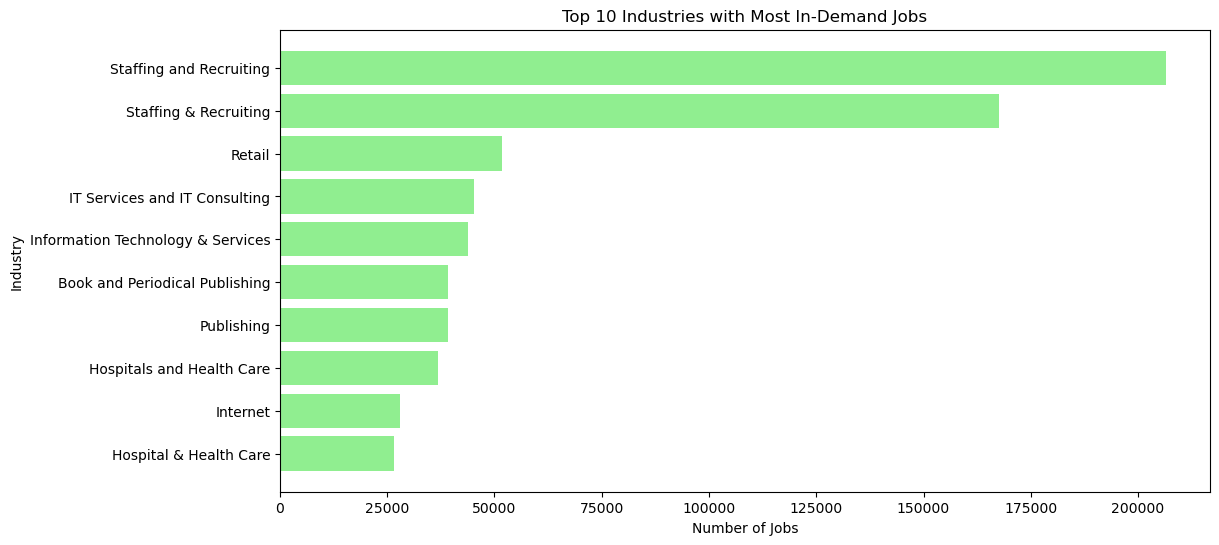

In [99]:
industry_stats_sorted = industry_stats.sort_values(by='Number of Jobs', ascending=False)

# Select the top 10 industries with the highest number of jobs
top_10_jobs = industry_stats_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_jobs.index, top_10_jobs['Number of Jobs'], color='lightgreen')
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Most In-Demand Jobs')
plt.gca().invert_yaxis()  # Invert y-axis to display highest demand at the top
plt.show()

## Top states with job posting number, average salary

In [36]:
jobs_posting.columns.tolist()

['job_id',
 'company_id',
 'title',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'formatted_work_type',
 'location',
 'applies',
 'original_listed_time',
 'remote_allowed',
 'views',
 'job_posting_url',
 'application_url',
 'application_type',
 'expiry',
 'closed_time',
 'formatted_experience_level',
 'skills_desc',
 'listed_time',
 'posting_domain',
 'sponsored',
 'work_type',
 'currency',
 'compensation_type',
 'scraped',
 'new_original_listed_time',
 'new_closed_time',
 'new_listed_time',
 'avg_salary',
 'yearly_avg_salary',
 'Location_x',
 'city_x',
 'state_x',
 'Location_y',
 'city_y',
 'state_y']

In [56]:
# Top 10 states that post the highest amount of jobs on Linkedln
X_sorted = jobs_posting.groupby('state')['job_id'].count().sort_values(ascending=False).head(10)
X_sorted

state
California        2667
Texas             1932
Florida           1224
New York          1166
Illinois           929
North Carolina     738
Virginia           722
Massachusetts      718
Pennsylvania       702
Georgia            692
Name: job_id, dtype: int64

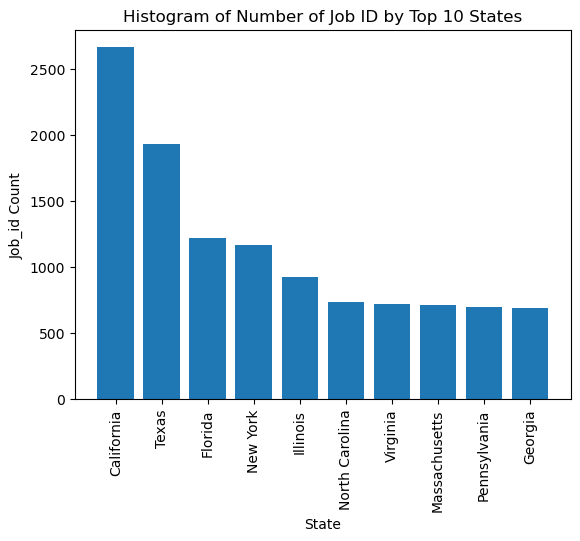

In [59]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.bar(X_sorted.index, X_sorted.values)
plt.xlabel('State')
plt.ylabel('Job_id Count')
plt.title('Histogram of Number of Job ID by Top 10 States')
plt.xticks(rotation=90)
plt.show()

In [57]:
X1_sorted = jobs_posting.groupby('state')['yearly_avg_salary'].mean().sort_values(ascending=False).head(10)
X1_sorted

state
Colorado                556605.541040
Illinois                456432.953515
California              283130.654434
District Of Columbia    118298.812308
New York                104660.415349
Massachusetts           104568.639474
Virginia                 99331.611229
Washington               95233.463467
New Hampshire            94666.280645
South Dakota             94420.986667
Name: yearly_avg_salary, dtype: float64

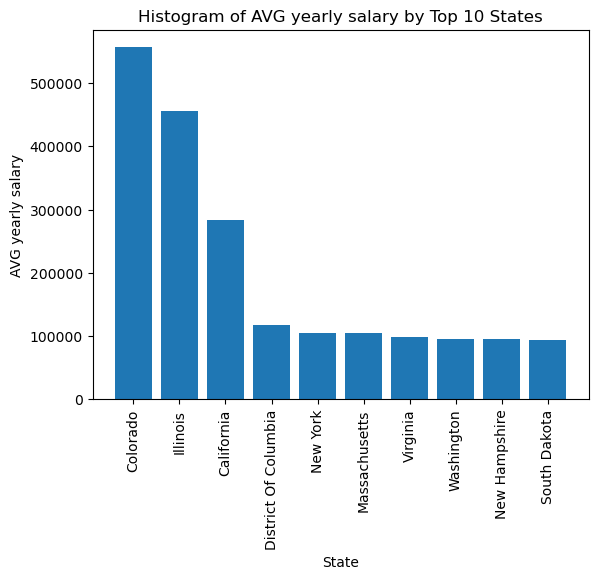

In [60]:
# Plot the histogram
plt.bar(X1_sorted.index, X1_sorted.values)
plt.xlabel('State')
plt.ylabel('AVG yearly salary')
plt.title('Histogram of AVG yearly salary by Top 10 States')
plt.xticks(rotation=90)
plt.show()

## Compare remote vs in person in term of salary, demand

In [62]:
jobs_posting['remote_allowed'] = jobs_posting['remote_allowed'].replace({1.0: 'Yes', pd.NA:'Other'})
jobs_posting["remote_allowed"].head(5)

0    NaN
1    NaN
2    Yes
3    Yes
4    NaN
Name: remote_allowed, dtype: object

In [64]:
# jobs_posting_lcn[jobs_posting_lcn["remote_allowed"]==1].count()
jobs_posting["remote_allowed"].value_counts()

remote_allowed
Yes    3109
Name: count, dtype: int64

In [65]:
# Percentage of job allowed remote working
remote_percentage = (jobs_posting[jobs_posting["remote_allowed"]=="Yes"]["remote_allowed"].count() / len(jobs_posting)) * 100
remote_percentage

12.919177228339912

In [66]:
# Percentage of job NOT allowed remote working
not_remote_percentage = 100 - remote_percentage
not_remote_percentage

87.08082277166008

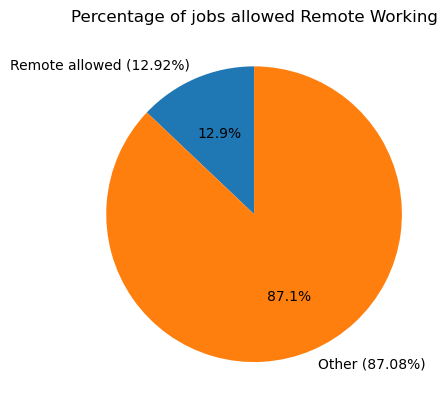

In [67]:
# Create labels for pie chart
labels = [f'Remote allowed ({remote_percentage:.2f}%)', f'Other ({not_remote_percentage:.2f}%)']

# Create values for pie chart
sizes = [remote_percentage, not_remote_percentage]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Percentage of jobs allowed Remote Working')
plt.show()

In [69]:
# Average yearly salary from jobs that allowed remote working vs Other
X2 = jobs_posting.groupby('remote_allowed')['yearly_avg_salary'].mean()
X2

remote_allowed
Yes    126969.671669
Name: yearly_avg_salary, dtype: float64

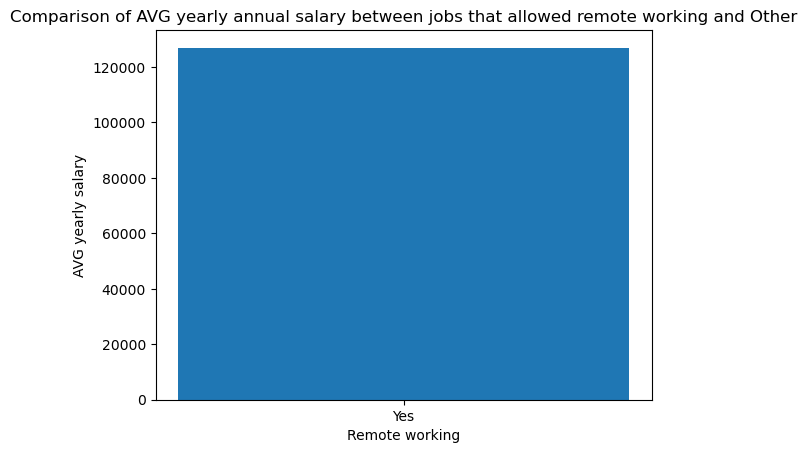

In [70]:
plt.bar(X2.index, X2.values)
plt.xlabel('Remote working')
plt.ylabel('AVG yearly salary')
plt.title('Comparison of AVG yearly annual salary between jobs that allowed remote working and Other')
plt.xticks(rotation=0)
plt.show()